# Libraries:

In [42]:
import torch
import torch.nn as nn
from torchvision import transform
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from torchvision.utils import save_image

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random

import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

In [63]:
#Some Variables 
minibatch_size = 8
num_classes = 1
learning_rate = 0.001
num_epochs = 5

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset:

In [64]:
image_dataset = ImageFolder(root=r"C:\Users\annotated_dataset")

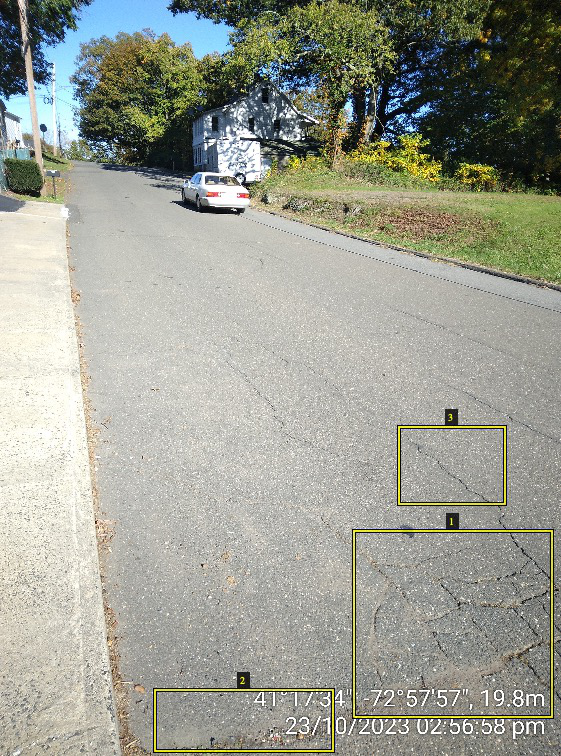

In [65]:
image_dataset[0][0]

In [66]:
#Finding Number of Mini-batches
total_minibatches = int(len(image_dataset)/batch_size)
total_minibatches

25

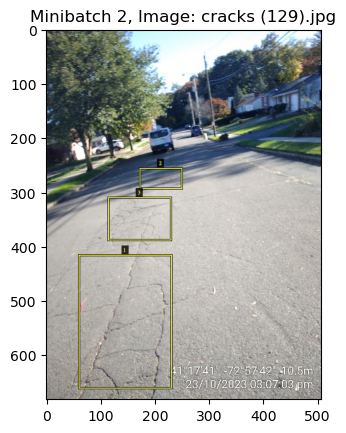

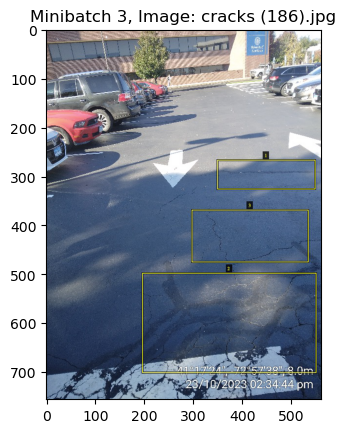

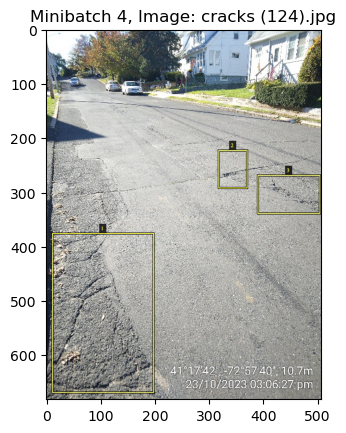

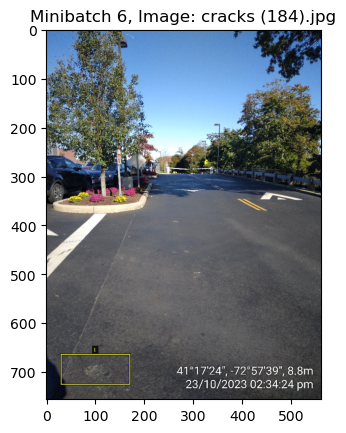

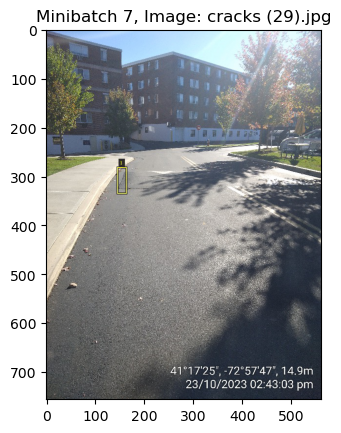

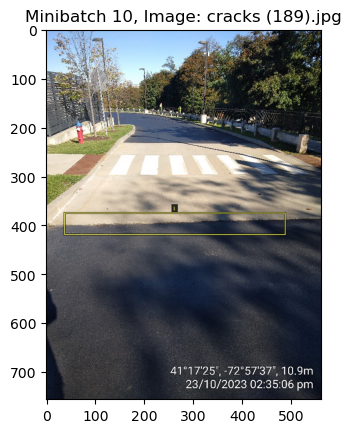

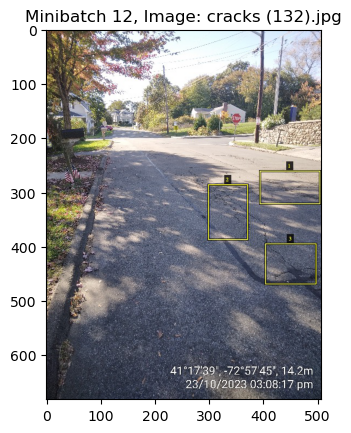

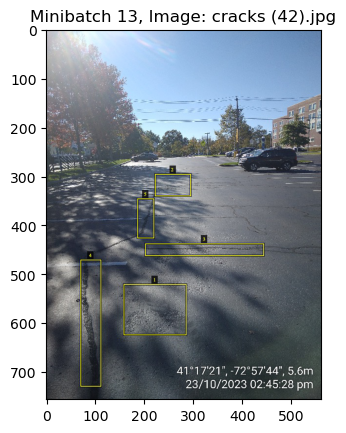

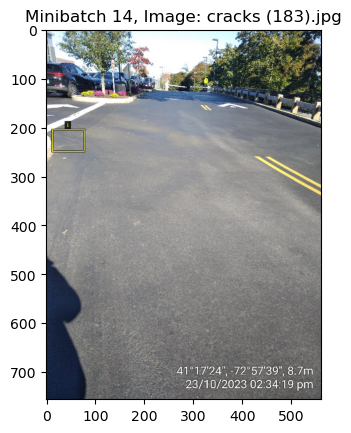

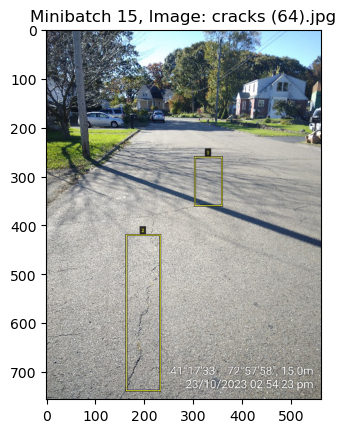

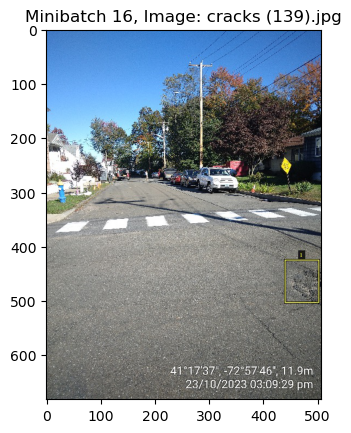

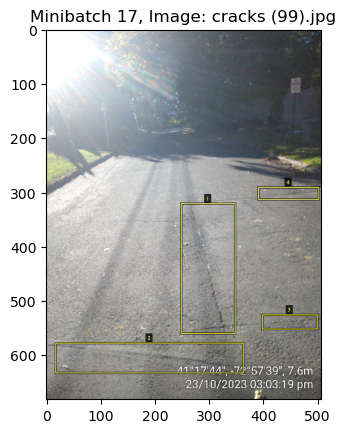

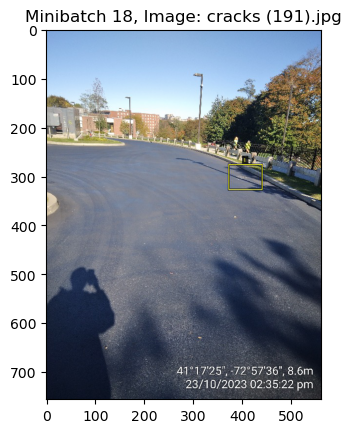

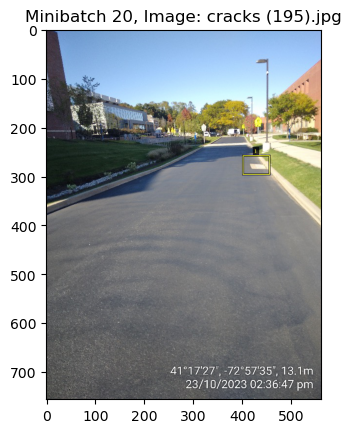

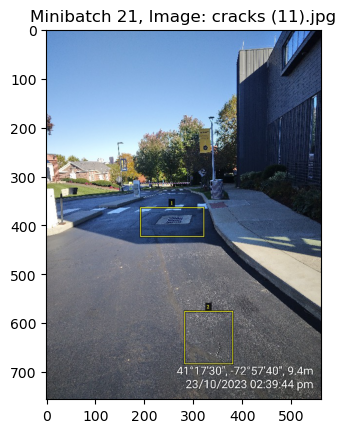

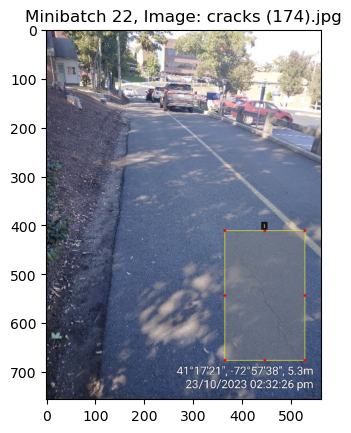

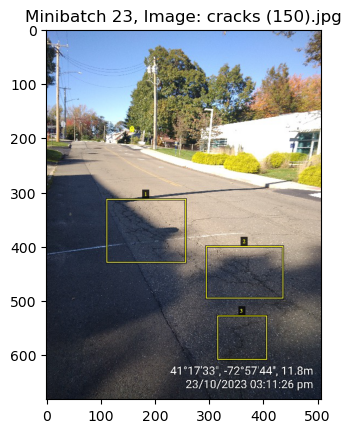

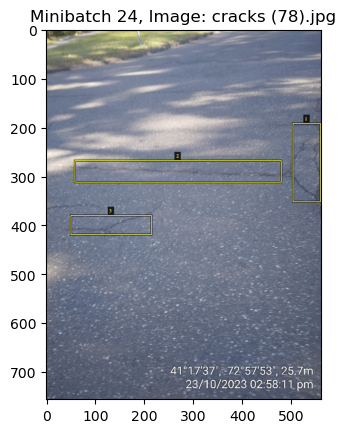

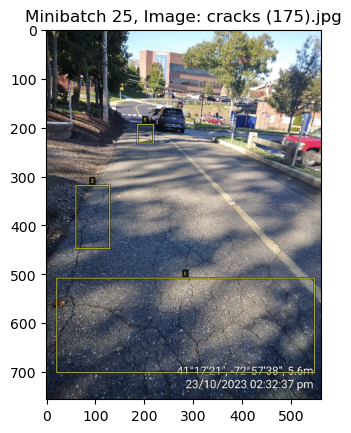

In [67]:
#path of image folder
folder_path = r"C:\Users\annotated_dataset\cracks"

# Getting files from image folder
image_files = os.listdir(folder_path)
random.shuffle(image_files)  

#displaying the first image of each minibatch
for minibatch in range(total_minibatches): 
    start_idx = minibatch * minibatch_size
    end_idx = start_idx + minibatch_size
    minibatch_files = image_files[start_idx:end_idx]

    for image_file in minibatch_files:
        image_path = os.path.join(folder_path, image_file)
        # Load and display the first image of the minibatch
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f"Minibatch {minibatch + 1}, Image: {image_file}")
        plt.show()
        break  



In [71]:
#Conversion of Image dataset to Tensors
numeric_dataset = ImageFolder(root=r"C:\Users\annotated_dataset",transform=transform)

In [72]:
#conversion of images to tensors
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((32,32)),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize((0.0), (1.0))
                               ])

In [74]:
#First image in the form of tensors now
numeric_dataset[0][0]

tensor([[[0.1281, 0.1111, 0.0768,  ..., 0.2478, 0.3191, 0.0805],
         [0.1361, 0.1041, 0.0860,  ..., 0.6328, 0.6157, 0.0799],
         [0.1224, 0.0750, 0.2883,  ..., 0.4595, 0.8013, 0.0876],
         ...,
         [0.8326, 0.9918, 0.7189,  ..., 0.7766, 0.7370, 0.7781],
         [0.5405, 0.4628, 0.4440,  ..., 0.7278, 0.6300, 0.7639],
         [0.5071, 0.4064, 0.5848,  ..., 0.7020, 0.7295, 0.7597]],

        [[0.1343, 0.1187, 0.0724,  ..., 0.3501, 0.3474, 0.0932],
         [0.1614, 0.1093, 0.1211,  ..., 0.7927, 0.5910, 0.1364],
         [0.1381, 0.0966, 0.3190,  ..., 0.6285, 0.7377, 0.1152],
         ...,
         [0.8405, 0.9918, 0.7174,  ..., 0.7609, 0.7230, 0.7624],
         [0.5386, 0.4589, 0.4400,  ..., 0.7042, 0.6251, 0.7503],
         [0.4965, 0.4025, 0.5756,  ..., 0.6839, 0.7098, 0.7323]],

        [[0.0632, 0.0785, 0.0150,  ..., 0.3039, 0.3518, 0.0826],
         [0.0117, 0.0357, 0.0362,  ..., 0.9546, 0.5957, 0.1509],
         [0.0805, 0.0465, 0.1562,  ..., 0.8271, 0.7048, 0.

In [75]:
#After Resizing the dataset
numeric_dataset[0][0].shape 

torch.Size([3, 32, 32])

In [76]:
#Size of whole dataset
len(numeric_dataset)

200

In [77]:
#dividing dataset into 80% training, 10% validation, and 10% test sets
training_set, validation_set, test_set = torch.utils.data.random_split(numeric_dataset, [160, 20, 20])

In [78]:
len(training_set) #size of training set

160

In [79]:
len(validation_set) #size of validation set

20

In [80]:
len(test_set) #size of test set

20

In [96]:
#Providing Training set to the dataloader
train_loader = DataLoader(training_set, batch_size= 8, shuffle=True)

# Model:

In [145]:
#DEfining Model layers, activation function, linear layers, forward propagation
class CNN (nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        #as conv layers are 2 or 3 D
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=2, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
    
        #conversion to 1D Fully Connected Layers, 
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear (1024,10)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(10,1) 
                
    def forward(self,x):  
        x = self.conv_layer1(x)
        x = self.relu1(x)
        
        x = self.conv_layer2(x)
        x = self.relu2(x)
        
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
                
        return x

In [146]:
model = CNN(num_classes)

# Setting Loss function 
criterion = nn.CrossEntropyLoss()

# Setting optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [147]:
#train on 1st mini-batch
for epoch in range(num_epochs):
    for batch_index, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Minibatch [{batch_index + 1}/{total_minibatches}], Loss: {loss.item()}')
        
        #STOP after 1 minibatch
        if batch_index == 0:
            break



Minibatch [1/25], Loss: 0.0
Minibatch [1/25], Loss: 0.0
Minibatch [1/25], Loss: 0.0
Minibatch [1/25], Loss: 0.0
Minibatch [1/25], Loss: 0.0


Loss = 0, which means due to small dataset, model memorizes patterns